# Exercises 20

## Imports and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Newtonsys(FdF, X0, kmax):
    """Solve system f(x) = 0 by Newton's method.

F(x) and F'(x) are computed by the user-supplied function FdF with the
 call [F,dF] = FdF(x), where F is a np.array holding the computed vector F(x) and
 dF is a np.array holding the computed matrix F'(x).

The starting point is x0.
 
The function carries out kmax iterations, and stores all kmax iterations
as columns on the output matrix Xiterations.

Per Christian Hansen and Hans Bruun Nielsen, DTU Compute, April 11, 2016.

Translated to Python spring 2023.

    Args:
        FdF (function): Function that computes F(x) and F'(x). Must return two np.arrays.
        X0 (np.array): The starting point
        kmax (int): Maximal number of iterations

    Returns:
        np.array: Iterations, stored columnwise
    """    

    # Initialization
    X = X0
    Fx, dFx = FdF(X)
    H = np.linalg.solve(dFx,Fx) # This is the first step.
    
    # Create the array to store the iterations.
    
    Xiterations = []
    # Now iterate.
    for k in range(1, kmax+1):
        X = X - H
        Xiterations.append(X)
        Fx, dFx = FdF(X)
        H = np.linalg.solve(dFx,Fx)
    

    return np.array(Xiterations)


## 20.1


In [11]:
def FdF_1(X):
    F1 = np.array([X[0] + X[1] + X[2]])
    F2 = np.array([X[0]**2 + X[1]**2 + X[2]**2 - 2])
    F3 = np.array([X[0]*(X[1] + X[2]) + 1])

    F = np.concatenate((F1,F2,F3))
    dF = np.array([[1,1,1],
                  [2*X[0], 2*X[1], 2*X[2]],
                  [X[1] + X[2], X[0], X[0]]])
    return F, dF

# Test
X = np.array([1,2,3])
FdF_1(X)

(array([ 6, 12,  6]),
 array([[1, 1, 1],
        [2, 4, 6],
        [5, 1, 1]]))

In [4]:
X0 = np.array([3/4, 1/2, -1/2])
Xiter = Newtonsys(FdF_1, X0, 10)

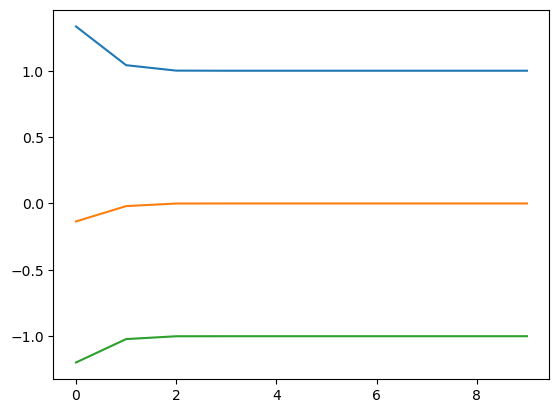

In [5]:
plt.plot(Xiter)
# Xiter

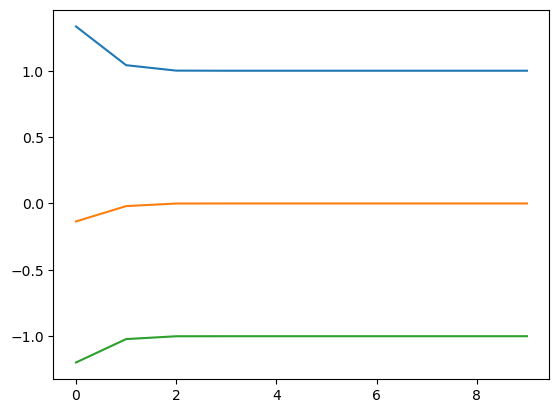

In [6]:

Xiter = Newtonsys(FdF_1, X0, 10)
plt.plot(Xiter)

In [7]:
X0 = np.array([3/4, 1/2, 1/2])
print(FdF_1(X0)[0])
print(FdF_1(X0)[1])
X0 = np.array([3/4, 1/2, -1/2])
print(FdF_1(X0)[0])
print(FdF_1(X0)[1])

[ 1.75   -0.9375  1.75  ]
[[1.   1.   1.  ]
 [1.5  1.   1.  ]
 [1.   0.75 0.75]]
[ 0.75   -0.9375  1.    ]
[[ 1.    1.    1.  ]
 [ 1.5   1.   -1.  ]
 [ 0.    0.75  0.75]]


The Jacobian is singular at $(3/4, 1/2, 1/2)$

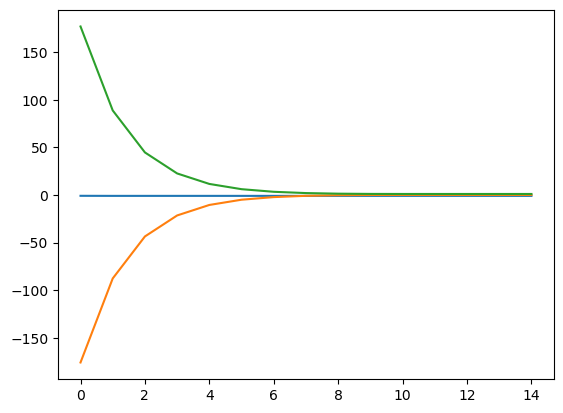

In [8]:
X0 = np.array([3/4, 1/2, 1/2+0.01])
Xiter = Newtonsys(FdF_1, X0, 15)
plt.plot(Xiter)

Exercise 20.2 - kinematics problem

In [9]:
P1 = lambda w: np.array([np.cos(w),np.sin(w)]); P2 = lambda w: np.array([np.sin(w),6 + np.cos(w)])